네이버 뉴스 수집(2)

컨텐츠로 접근할 수 있는 웹 페이지의 주소들을 수집하고 그 목록을 리스트로 정의.

리스트에 대해 반복문을 수행하면서 컨텐츠 수집

## 01. 필요한 모듈 참조

In [32]:
import requests  # -> 웹페이지 요청 모듈
import os       # -> 날짜 처리 모듈
import datetime as dt # ->날짜 처리 모듈
from bs4 import BeautifulSoup # -> 웹페이지 소스코드 분석 모듈
from pandas import DataFrame

-----------------------------------------
## #02. 수집 준비

### 1)접속을 수행하기 위한 session 객체 생성

In [33]:
# 접속 세션 만들기
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"

session = requests.Session()
session.headers.update({'User-agent':user_agent, 'referer':None})

### 2)접근할 페이지 주소(네이버 메인 뉴스)

In [34]:
content_url = "https://news.naver.com"

### 3)수집된 기사들이 텍스트로 저장될 폴더 생성

In [35]:
# 뉴스 기사가 저장될 폴더이름 구성
datetime = dt.datetime.now().strftime("%y%m%d_%H%M%S")
dirname = "%s_%s" % ('뉴스기사', datetime)

# 뉴스기사를 텍스트 파일로 저장할 폴더 만들기
if not os.path.exists(dirname):
    os.mkdir(dirname)

## #03.컨텐츠의 주소들을 수집하기

1) 네이버 뉴스 메인 소스코드 가져오기

In [36]:
r = session.get(content_url)

#-> 결과확인
if r.status_code != 200:
    print("%d 에러가 발생했습니다." % r.status_code)
    # 즉시 종료 --> jupyter가 재시작됨
    quit()
    
r.encoding = "euc-kr"
r.text

'\n\n\n\n\n\n\n\n\n\n\n\t\n\t\t\n\t\n\t\n\n\n<!DOCTYPE HTML>\n<html lang="ko">\n<head>\n<meta charset="euc-kr">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="referrer" contents="always">\n<meta http-equiv="refresh" content="600" />\n<meta name="viewport" content="width=1106" />\n\r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n\r\n<meta property="og:title"       content="네이버 뉴스">\r\n<meta property="og:type"        content="website">\r\n<meta property="og:url"         content="http://news.naver.com/main/home.nhn">\r\n<meta property="og:image"       content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png"/>\r\n<meta property="og:description" content="정치, 경제, 사회, 생활/문화, 세계, IT/과학 등 언론사별, 분야별 뉴스 기사 제공">\r\n<meta property="og:article:author"\tcontent="네이버"/>\r\n\r\n<meta name="twitter:card"\t\tcontent="summary">\r\n<meta name="twitter:

2) 컨텐츠의 URL 수집

In [37]:
# 웹 페이지의 소스코드 HTML 분석 객체로 생성
soup = BeautifulSoup(r.text, 'html.parser')

# CSS 선택자를 활용하여 가져오기를 원하는 부분 지정
# -> 여러개의 선택자를 사용해야 할 경우 콤마(,)로 구분
selector = soup.select('.lnk_hdline_main_article, .lnk_hdline_article, .mtype_img > dt > a, .mlist2 > li > a')

if not selector:  #가져온 내용이 없다면?
    print("뉴스기사 크롤링 실패")
    quit()

selector

[<a class="lnk_hdline_main_article nclicks('mai.image', '880000D8_000000000000000011185359', 'airsGParam', '0', 'news_qm_v2.0', '9jCu7TRTk3eDne8E')" href="/main/read.nhn?mode=LSD&amp;mid=shm&amp;sid1=102&amp;oid=001&amp;aid=0011185359">
 <img alt="속도 내는 '독도 추락헬기' 실종자 수색…동체 인양도 검토" height="190" src="https://imgnews.pstatic.net/image/001/2019/11/02/PYH2019110202520001300_P2_20191102143621319.jpg?type=nf270_166" width="300"/>
 <div class="hdline_flick_mask">
 <p class="hdline_flick_tit">속도 내는 '독도 추락헬기' 실종자 수색…동체 인…</p>
 </div>
 </a>,
 <a class="lnk_hdline_main_article nclicks('mai.image', '880000D1_000000000000000003040581', 'airsGParam', '0', 'news_qm_v2.0', '9jCu7TRTk3eDne8E')" href="/main/read.nhn?mode=LSD&amp;mid=shm&amp;sid1=102&amp;oid=081&amp;aid=0003040581">
 <img alt="‘화성 실종 초등생’ 30년만의 수색에 아버지 울분 터뜨려" height="190" src="https://imgnews.pstatic.net/image/081/2019/11/02/0003040581_001_20191102142144912.jpg?type=nf270_166" width="300"/>
 <div class="hdline_flick_mask">
 <p class="hdl

3) 수집한 <a> 태그에서 URL만 추출

In [38]:
# 뉴스기사의 본문 URL을 저장할 리스트
url_list = []

#리스트의 원소들에 대한 반복 처리
for item in selector:
    #print(type(item.attrs))
    #print(item.attrs)
    
    #각 원소(링크)에 속성들(attrs) 중에 href 속성이 있다면 그 값을 별도로 준비한 리스트에 추기
    if "href" in item.attrs:
        if content_url in item['href']:
            url_list.append(item['href'])
        else:
            url_list.append(content_url + item['href'])

url_list

['https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=001&aid=0011185359',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=081&aid=0003040581',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=055&aid=0000769494',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=422&aid=0000399430',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=104&oid=018&aid=0004507090',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=469&aid=0000436526',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=469&aid=0000436514',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=018&aid=0004507141',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=052&aid=0001361101',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=001&aid=0011185353',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=421&aid=0004283508',
 'https://

## 04.뉴스기사들 수집

In [39]:
#모든 기사의 본문을 누적하기 위한 문자열 변수
content_merge = " "

# URL 목록만큼 반복
for i, url in enumerate(url_list):
    print("%d번째 뉴스기사 수집중...>> %s" % (i+1, url))
    
    r = session.get(url)
    
    if r.status_code != 200:
        print("%d 에러가 발생했습니다." % r.status_code)
        continue
    
    r.encoding = "euc-kr"
    
    soup = BeautifulSoup(r.text, 'html.parser')
    
    main_content = soup.select("#main_content")
    title = main_content[0].select("#articleTitle")
    title_str = title[0].text.strip()
    # 기사 제목에서 파일이름으로 사용할 수 없는 특수문자 제거
    title_str = title_str.replace("'","")
    title_str = title_str.replace("\"","")
    title_str = title_str.replace("?","")
    title_str = title_str.replace("'","")
    title_str = title_str.replace("'","")
    title_str = title_str.replace("/","")
    title_str = title_str.replace(">","")
    title_str = title_str.replace("<","")

    #본문 가져오기
    article = main_content[0].select('#articleBodyContents')
    article_item = article[0]
    
    for target in article_item.find_all('script'): target.extract()
    for target in article_item.find_all('a'): target.extract()
    for target in article_item.find_all('span'): target.extract()
    for target in article_item.find_all('div'): target.extract()
    for target in article_item.find_all('br'): target.replace_with("\n")
        
    article_str = article_item.text.strip()
    
    # 제목과 내용이 모두 존재한다면?
    if title_str and article_str:
        # 기사 제목을 파일명으로 지정하여 내용을 텍스트로 저장한다.
        fname = dirname + "/" + title_str + ".txt"
        with open(fname, 'w', encoding = "utf-8") as f:
            f.write(article_str)
            print(" >> 파일저장 성공: " + fname)
            
        # 뉴스 기사의 모든 본문을 하나의 문자열에 누적
        content_merge += article_str

content_merge

1번째 뉴스기사 수집중...>> https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=001&aid=0011185359
 >> 파일저장 성공: 뉴스기사_191102_145048/속도 내는 독도 추락헬기 실종자 수색…동체 인양도 검토.txt
2번째 뉴스기사 수집중...>> https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=081&aid=0003040581
 >> 파일저장 성공: 뉴스기사_191102_145048/‘화성 실종 초등생’ 30년만의 수색에 아버지 울분 터뜨려.txt
3번째 뉴스기사 수집중...>> https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=055&aid=0000769494
 >> 파일저장 성공: 뉴스기사_191102_145048/[Pick] 참 안타깝다 금태섭, 이자스민 응원하며 민주당에 쓴소리.txt
4번째 뉴스기사 수집중...>> https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=422&aid=0000399430
 >> 파일저장 성공: 뉴스기사_191102_145048/무인잠수정 정밀 탐색…시신 3구 발견.txt
5번째 뉴스기사 수집중...>> https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=104&oid=018&aid=0004507090
 >> 파일저장 성공: 뉴스기사_191102_145048/베트남, 냉동 컨테이너 비극에 큰 충격…“인신매매는 심각한 범죄”.txt
6번째 뉴스기사 수집중...>> https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=469&aid=0000436526
 >> 파일저장 성공: 뉴스기사_191102_145048/홍준표 

' 무인잠수정·심해잠수사 50여명 투입…감압챔버 활용 수중수색\n\n\n\n    (동해=연합뉴스) 이재현 기자 = 응급환자 이송 중 독도 인근 해상에서 추락한 소방 헬기의 실종자 수색에 청해진함의 무인잠수정과 심해잠수사(포화잠수사) 50여명이 투입됨에 따라 실종자 수습과 동체 인양이 속도를 내고 있다.\n\n    2일 수색 당국에 따르면 이날 오전 8시 50분부터 해군 청해진함 무인잠수정(ROV)과 해군 잠수사 등을 독도 해역 헬기 추락사고 현장에 투입, 수색 과정에서 동체가 발견된 해역에서 시신 3구를 발견했다.\n\n    이날 수중 집중 수색에는 해군 해난구조대(SSU) 소속 심해잠수사 50여명이 투입됐다.\n\n    우리 해군은 300ｍ 수심에서 14일 동안 작전을 수행할 수 있는 포화 잠수 능력을 갖추고 있다.\n\n    포화 잠수는 잠수사가 수상함에 설치된 챔버에 들어가 작전을 수행할 바다 깊이에 맞게 신체 조건을 조절한 다음 장시간 심해에서 활동하는 것으로, 극도의 체력 소모를 이겨내야 하는 작업이다.\n\n    포화 잠수 기법은 1940년대 미국 해군이 처음으로 개발했으나 우리 해군의 포화 잠수 능력은 세계 최고 수준으로 인정받고 있다.\n\n    해군은 청해진함에서 사고 헬기의 동체와 동일한 수심에 감압챔버를 내린 뒤 잠수사들이 챔버에서 휴식하면서 수색하는 방식으로 진행 중이라고 밝혔다.\n\n    해군은 "감압챔버를 이용한 잠수는 한번 작업하고 올라왔다가 다시 내려가는 테크니컬 잠수보다 이동 시간을 줄일 수 있다"며 "현장에서의 작업 시간을 늘리기 위해 좀 더 효율적인 잠수 방법을 택해 수색을 진행하고 있다"고 밝혔다.\n\n\n\n    청해진함 무인잠수정은 로봇팔을 보유하고 있어 정밀 탐색뿐만 아니라 실종자 수습도 가능할 것으로 해경은 예상한다.\n\n    전장 102ｍ, 3천200t 규모의 청해진함은 1996년 12월 취역한 우리 해군의 첫 번째 잠수함 구조함이다.\n\n    포화 잠수체계(Deep Diving Syste

## 01.필요한 모듈 참조

워드클라우드 모듈 설치

> pip install --upgrade wordcloud

한글 형태소 분석 모듈 설치

1. java 1.8 버전에 대한 개발환경이 필수적으로 필요함 : 자바 환경변수 설정 JAVA_HOME, PATH, 값 설정이 필요함(책, 서핑 참조)
    --> 명령프롬프트에서 다음으로 확인 가능
    javac -version
2. VC++ 개발환경의 2014년도 버전이 필수적으로 필요함
3. 개발환경 완료 후 모듈 설치

JAVA와 파이썬 연동 기능을 제공하는 패키지 설치(버전주의)
> pip install --upgrade jpype1==0.6.3

Konlpy 설치
> pip install --upgrade konlpy

In [43]:
import requests                       #
import os
import datetime as dt
from bs4 import BeautifulSoup
from wordcloud import WordCloud       # -> 워드클라우드 모듈
from collections import Counter       # -> 빈도수 추출을 위한 모듈(내장모듈)
from konlpy.tag import Okt            # -> 한글 형태소 분석 모듈

## #05. 워드클라우드 생성

In [44]:
#형태소 분석 객체를 통해 수집된 뉴스 본문에서 명사만 추출
nlp = Okt()
nouns = nlp.nouns(content_merge)
nouns

['무인',
 '잠수정',
 '심해',
 '잠',
 '수사',
 '여명',
 '투입',
 '감압챔버',
 '활용',
 '수중',
 '수색',
 '동해',
 '연합뉴스',
 '이재현',
 '기자',
 '응급환자',
 '이송',
 '중',
 '독도',
 '인근',
 '해상',
 '추락',
 '소방',
 '헬기',
 '실종자',
 '수색',
 '청해진함',
 '무인',
 '잠수정',
 '심해',
 '잠',
 '수사',
 '포화잠수',
 '사',
 '여명',
 '투입',
 '실종자',
 '수습',
 '동체',
 '인양',
 '속도',
 '수색',
 '당국',
 '날',
 '오전',
 '해군',
 '청해진함',
 '무인',
 '잠수정',
 '과',
 '해군',
 '잠',
 '수사',
 '등',
 '독도',
 '해역',
 '헬기',
 '추락사고',
 '현장',
 '투입',
 '수색',
 '과정',
 '동체',
 '발견',
 '해역',
 '시신',
 '발견',
 '날',
 '수중',
 '집중',
 '수색',
 '해군',
 '해난구조대',
 '소속',
 '심해',
 '잠',
 '수사',
 '여명',
 '투입',
 '우리',
 '해군',
 '수심',
 '동안',
 '작전',
 '수행',
 '수',
 '포화',
 '잠수',
 '능력',
 '포화',
 '잠수',
 '잠수',
 '사가',
 '설치',
 '챔버',
 '작전',
 '수행',
 '바다',
 '깊이',
 '신체',
 '조건',
 '조절',
 '다음',
 '장시간',
 '심해',
 '활동',
 '것',
 '극도',
 '체력',
 '소모',
 '작업',
 '포화',
 '잠수',
 '기법',
 '미국',
 '해군',
 '처음',
 '개발',
 '우리',
 '해군',
 '포화',
 '잠수',
 '능력',
 '세계',
 '최고',
 '수준',
 '해군',
 '청해진함',
 '사고',
 '헬기',
 '동체',
 '수심',
 '감압챔버',
 '뒤',
 '잠수',
 '챔버',
 '휴식',
 '수색',
 '방식',
 '진행',
 '중이'

In [45]:
count = Counter(nouns)    # 명사들에 대한 빈도수 검스
count

Counter({'무인': 8,
         '잠수정': 9,
         '심해': 7,
         '잠': 4,
         '수사': 20,
         '여명': 5,
         '투입': 6,
         '감압챔버': 3,
         '활용': 6,
         '수중': 2,
         '수색': 27,
         '동해': 9,
         '연합뉴스': 18,
         '이재현': 1,
         '기자': 56,
         '응급환자': 1,
         '이송': 1,
         '중': 38,
         '독도': 10,
         '인근': 14,
         '해상': 5,
         '추락': 10,
         '소방': 10,
         '헬기': 25,
         '실종자': 10,
         '청해진함': 10,
         '포화잠수': 1,
         '사': 2,
         '수습': 10,
         '동체': 19,
         '인양': 12,
         '속도': 6,
         '당국': 21,
         '날': 24,
         '오전': 10,
         '해군': 11,
         '과': 6,
         '등': 113,
         '해역': 2,
         '추락사고': 1,
         '현장': 16,
         '과정': 13,
         '발견': 52,
         '시신': 27,
         '집중': 6,
         '해난구조대': 1,
         '소속': 6,
         '우리': 30,
         '수심': 5,
         '동안': 10,
         '작전': 3,
         '수행': 2,
         '수': 118,
      

In [47]:
most = count.most_common(100) # 가장 많이 사용된 단어 100개 추출
most

[('것', 264),
 ('이', 145),
 ('수', 118),
 ('등', 113),
 ('전', 104),
 ('고', 83),
 ('대표', 76),
 ('그', 69),
 ('말', 64),
 ('한국', 62),
 ('재', 61),
 ('의원', 58),
 ('기자', 56),
 ('발견', 52),
 ('며', 52),
 ('경찰', 48),
 ('곳', 43),
 ('사람', 43),
 ('서울', 41),
 ('및', 40),
 ('때문', 40),
 ('보험', 39),
 ('중', 38),
 ('명', 37),
 ('주장', 37),
 ('잡지', 37),
 ('더', 36),
 ('현재', 36),
 ('교수', 36),
 ('뉴스', 35),
 ('를', 34),
 ('때', 34),
 ('위', 34),
 ('위해', 33),
 ('지난달', 33),
 ('조사', 33),
 ('통해', 32),
 ('대한', 32),
 ('사건', 31),
 ('비판', 31),
 ('대통령', 31),
 ('우리', 30),
 ('의', 30),
 ('금지', 30),
 ('무단', 29),
 ('영국', 29),
 ('명왕성', 29),
 ('배포', 28),
 ('국회', 28),
 ('최근', 28),
 ('경우', 28),
 ('수색', 27),
 ('시신', 27),
 ('베트남', 27),
 ('영화', 27),
 ('지금', 26),
 ('문제', 26),
 ('상황', 26),
 ('설명', 26),
 ('관련', 26),
 ('입', 26),
 ('국민', 26),
 ('검찰', 26),
 ('금융', 26),
 ('헬기', 25),
 ('당시', 25),
 ('앞', 25),
 ('또', 25),
 ('날', 24),
 ('진행', 24),
 ('이번', 24),
 ('사회', 24),
 ('조커', 24),
 ('작업', 23),
 ('내', 23),
 ('이상', 23),
 ('대출', 23),
 ('청도', 23),
 

In [48]:
# 추출 결과를 워드 클라우드에서 요구하는 형식으로 재구성
# --> {"단어":빈도수 "단어":빈도수....}
tags = {}
for n, c in most:
    if len(n) > 1:
        tags[n] = c 
tags        

{'대표': 76,
 '한국': 62,
 '의원': 58,
 '기자': 56,
 '발견': 52,
 '경찰': 48,
 '사람': 43,
 '서울': 41,
 '때문': 40,
 '보험': 39,
 '주장': 37,
 '잡지': 37,
 '현재': 36,
 '교수': 36,
 '뉴스': 35,
 '위해': 33,
 '지난달': 33,
 '조사': 33,
 '통해': 32,
 '대한': 32,
 '사건': 31,
 '비판': 31,
 '대통령': 31,
 '우리': 30,
 '금지': 30,
 '무단': 29,
 '영국': 29,
 '명왕성': 29,
 '배포': 28,
 '국회': 28,
 '최근': 28,
 '경우': 28,
 '수색': 27,
 '시신': 27,
 '베트남': 27,
 '영화': 27,
 '지금': 26,
 '문제': 26,
 '상황': 26,
 '설명': 26,
 '관련': 26,
 '국민': 26,
 '검찰': 26,
 '금융': 26,
 '헬기': 25,
 '당시': 25,
 '진행': 24,
 '이번': 24,
 '사회': 24,
 '조커': 24,
 '작업': 23,
 '이상': 23,
 '대출': 23,
 '청도': 23,
 '사고': 22,
 '자신': 22,
 '생각': 22,
 '정도': 22,
 '장관': 22,
 '당국': 21,
 '해당': 21,
 '아이': 21,
 '민주당': 21,
 '라며': 21,
 '사진': 21,
 '수사': 20,
 '모두': 20,
 '확인': 20,
 '직접': 20,
 '일본': 20}

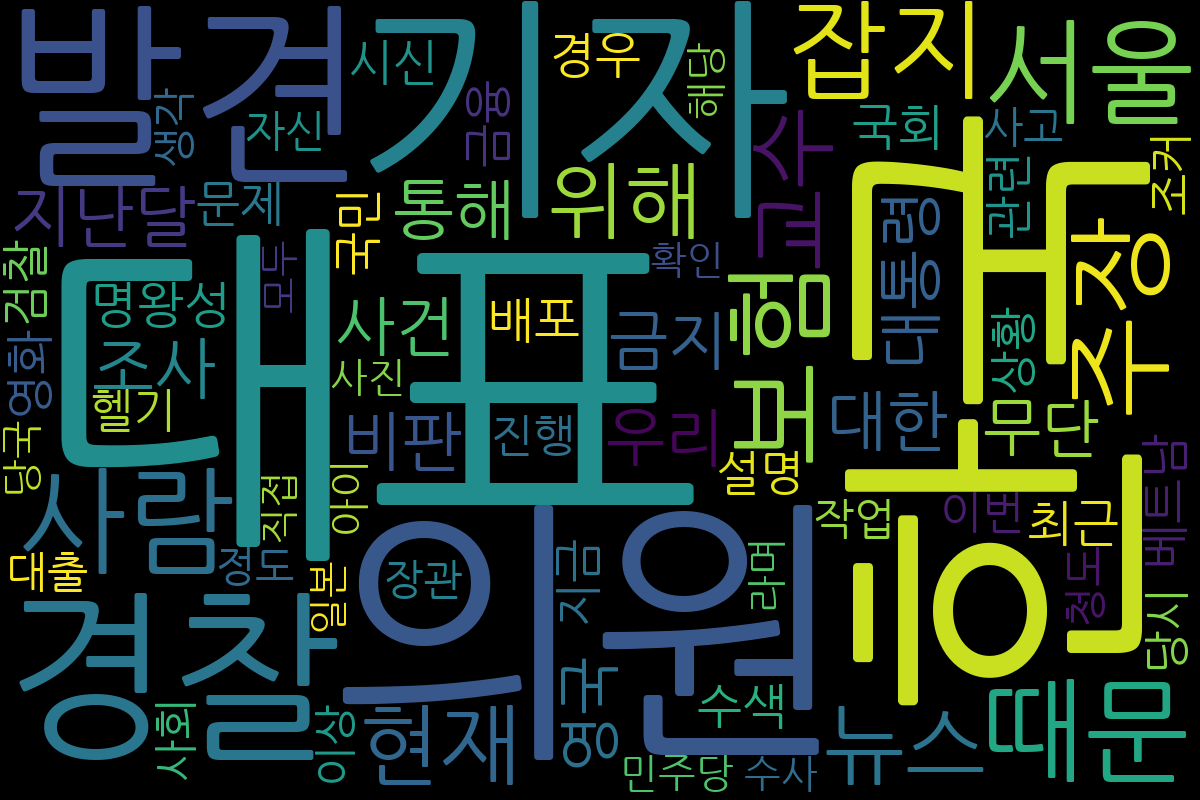

In [51]:
# 워드 클라우드 객체 만들기(글꼴의 절대 경로 지정 가능함)
wc = WordCloud(font_path="NanumGothic", width=1200, height=800)

wc.generate_from_frequencies(tags)    # 미리 준비한 딕셔너리를 통해 생성
wc.to_file("news_%s.png" % datetime)  # 워드 클라우드 이미지 저장
wc.to_image()                           # Jupyter에 출력하기 위해 이미지 데이터 추출